In [121]:
# by using built-in package
from sklearn import svm, datasets 
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit,cross_val_score,cross_validate
from sklearn import metrics
import statistics as sta
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from time import time
from matplotlib import pyplot as plt

In [122]:
df = pd.read_csv(r'/Users/song/Desktop/MScProject/data/raw_add_col.csv')
df['per_1_d']=df['per_1_d'].shift(periods=1)
df['up_do_1d']=df['up_do_1d'].shift(periods=1)
df['up_down']=df['up_down'].shift(periods=1)
df.head(10)

,Unnamed: 0,price_usd_close,active_count,new_non_zero_count,receiving_count,balance_exchanges,balance_exchanges_relative,exchange_net_position_change,active_3m_6m,active_6m_12m,...,1_10_address,10-100-address,100-1k-address,1k-10k-address,10k+address,per_1_d,SMA_3,SMA_7,up_down,up_do_1d
0,0,3741.296795,553993,264907,391023,2.769144e+06,0.158638,88231.509356,1.279000e+06,2.929466e+06,...,553350,132725,14780,1748,98,NaN,NaN,NaN,NaN,NaN
1,1,3840.959249,430421,204562,310117,2.768345e+06,0.158575,86871.085578,1.280466e+06,2.908014e+06,...,553552,132841,14775,1750,98,NaN,NaN,NaN,NaN,0.0
2,2,3943.289843,585888,286954,415822,2.764221e+06,0.158322,81605.338292,1.258734e+06,2.913987e+06,...,554524,132700,14770,1746,98,0.026638,3841.848629,NaN,0.026638,1.0
3,3,3836.558048,602487,312525,450616,2.754308e+06,0.157737,69354.944423,1.251645e+06,2.899543e+06,...,555297,133114,14769,1746,98,0.026642,3873.602380,NaN,0.026642,1.0
4,4,3858.238280,588143,300809,454714,2.757905e+06,0.157926,65661.622276,1.254295e+06,2.876563e+06,...,555489,133070,14785,1745,98,-0.027067,3879.362057,NaN,-0.027067,0.0
5,5,3841.061170,510108,266560,385492,2.763081e+06,0.158204,63579.188602,1.246993e+06,2.866121e+06,...,555496,133144,14781,1743,98,0.005651,3845.285833,NaN,0.005651,1.0
6,6,4076.203320,513094,264515,389274,2.766691e+06,0.158395,48330.876526,1.236735e+06,2.863502e+06,...,555803,133202,14791,1741,98,-0.004452,3925.167590,3876.800958,-0.004452,-1.0
7,7,4024.462066,605722,308682,448075,2.766958e+06,0.158394,46314.881994,1.226954e+06,2.788592e+06,...,556205,133207,14805,1747,97,0.061218,3980.575519,3917.253140,0.061218,1.0
8,8,4033.554754,618858,324750,465067,2.766451e+06,0.158346,47264.324523,1.227683e+06,2.782270e+06,...,556260,133291,14810,1746,97,-0.012693,4044.740047,3944.766783,-0.012693,0.0
9,9,4035.712941,615693,318696,463356,2.769328e+06,0.158492,50717.395177,1.252238e+06,2.773619e+06,...,556204,132912,14766,1755,97,0.002259,4031.243254,3957.970083,0.002259,-1.0


In [123]:
(3741.296795-3840.959249)/3741.296795

-0.02663847843699334

In [124]:
#2. import dataset and split dataset 
df = pd.read_csv(r'/Users/song/Desktop/MScProject/data/raw_add_col.csv')
condition = [(df["per_1_d"]<=0.0),(df["per_1_d"]>=0.0)]
values = [-1,1]
df['up_do_1d_2_dir'] = np.select(condition,values)

# df['per_1_d']=df['per_1_d'].shift(periods=1)
# df['up_do_1d']=df['up_do_1d'].shift(periods=1)
# df['up_down']=df['up_down'].shift(periods=1)
# df['up_do_1d_2_dir']=df['up_do_1d_2_dir'].shift(periods=1)
df = df.iloc[10:,]
#shift the target columns for 1 days
# df['1_day_shift']=df['per_1_d'].shift(periods=1)
# df = df[1:]

#exclude time columns
# df_X = df.drop(columns = ['time','time_real','up_down','up_do_1d','per_1_d','SMA_3','SMA_7','price_usd_close','1_day_shift','up_do_1d_2_dir'])
df_X = df.drop(columns = ['time','time_real','up_down','up_do_1d','per_1_d','price_usd_close','up_do_1d_2_dir'])
df_time = pd.DataFrame(df['time_real'])
df_y = pd.DataFrame(df['up_do_1d_2_dir'])

In [125]:
df.head(20)

,Unnamed: 0,price_usd_close,active_count,new_non_zero_count,receiving_count,balance_exchanges,balance_exchanges_relative,exchange_net_position_change,active_3m_6m,active_6m_12m,...,10-100-address,100-1k-address,1k-10k-address,10k+address,per_1_d,SMA_3,SMA_7,up_down,up_do_1d,up_do_1d_2_dir
10,10,3679.793474,646786,328827,489563,2.769564e+06,0.158488,44222.662993,1.255480e+06,2.763143e+06,...,133106,14764,1751,98,-0.088192,3916.353723,3935.575144,-0.088192,0,-1
11,11,3686.219929,623732,311242,486664,2.766184e+06,0.158277,35459.154493,1.255087e+06,2.745078e+06,...,133132,14751,1745,97,0.001746,3800.575448,3911.001093,0.001746,-1,1
12,12,3660.899282,511629,274828,396622,2.764920e+06,0.158189,29528.743224,1.252713e+06,2.727129e+06,...,133159,14736,1744,97,-0.006869,3675.637562,3885.263681,-0.006869,0,-1
13,13,3552.009170,484995,252763,372212,2.764992e+06,0.158178,32393.320419,1.270672e+06,2.724712e+06,...,133249,14732,1746,97,-0.029744,3633.042794,3810.378802,-0.029744,0,-1
14,14,3706.052220,599565,317177,455291,2.768236e+06,0.158347,34716.352930,1.275125e+06,2.711689e+06,...,133265,14740,1742,98,0.043368,3639.653557,3764.891681,0.043368,1,1
15,15,3629.399490,618207,327628,466219,2.769965e+06,0.158431,36227.421618,1.270906e+06,2.691351e+06,...,133217,14758,1743,98,-0.020683,3629.153627,3707.155215,-0.020683,0,-1
16,16,3656.464775,653009,352464,493983,2.772951e+06,0.158586,31892.907985,1.273952e+06,2.677954e+06,...,133182,14744,1739,98,0.007457,3663.972162,3652.976906,0.007457,1,1
17,17,3679.812621,610155,321945,462880,2.776267e+06,0.158762,31985.111480,1.273024e+06,2.650164e+06,...,133373,14728,1738,98,0.006385,3655.225629,3652.979641,0.006385,1,1
18,18,3653.666461,625350,327181,484528,2.774607e+06,0.158651,28705.314044,1.270115e+06,2.638395e+06,...,133269,14723,1739,98,-0.007105,3663.314619,3648.329146,-0.007105,0,-1
19,19,3729.082298,526843,277542,400041,2.774317e+06,0.158619,16902.766202,1.263337e+06,2.627490e+06,...,133279,14709,1739,98,0.020641,3687.520460,3658.069577,0.020641,1,1


In [3]:
# df2 = df.iloc[30:,]
# df2_up_do_1d = df['up_do_1d']
# df2_price_usd_close = df['price_usd_close']
# df2_time_real = df['time']
# df2_up_down = df['up_down']
# #set index
# df2 = df.set_index('time_real')
# # df2 = df2.iloc[30:,]


# df2 = df.drop(['up_do_1d','up_down','time'],axis = 1)
# df2
# df2_time_real

In [126]:
#3. normlise datset
X_max = df_X.max()
X_min = df_X.min()
y_max = df_y.max()
y_min = df_y.min()
X_gap = X_max-X_min
y_gap = y_max-y_min
X=(df_X-X_min)/(X_gap)
y=df_y
# y=(df_y-y_min)/(y_gap)

# reversey = X * (X_max-X_min) + X_min
# change the first 'price_usd_close' to the last column
# norm_df= norm_df[[col for col in norm_df if col != 'price_usd_close']+['price_usd_close']]
# norm_df.head(10)

In [106]:
y.head()

,up_do_1d
10,-1.0
11,0.0
12,-1.0
13,0.0
14,0.0


up_do_1d_2_dir
 1                0.524891
-1                0.475109
dtype: float64


([<matplotlib.patches.Wedge at 0x7ffe7cbb0610>,
 [Text(-0.08592893341190937, 1.096638599723123, ''),
  Text(0.08592893341190923, -1.096638599723123, '')],
 [Text(-0.04687032731558693, 0.5981665089398852, '52.5%'),
  Text(0.04687032731558685, -0.5981665089398852, '47.5%')])

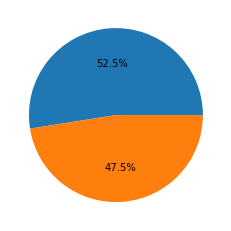

In [127]:
#number of sifferent class
sizes = y.value_counts(sort = 1)
print(sizes/len(y))
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
#4. set up socring metrics
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error']

In [ ]:
#5. cross validation methods
crv = ShuffleSplit(n_splits = 5,test_size=0.2,random_state = 42)
# scores = cross_validate (regressor, df_X, df_y, cv = crv, scoring = scoring,n_jobs = -1)

In [ ]:
#6. paramters
params = [{'kernel':['linear'],'C':[0.1,0.5,1,5,10,100],'epsilon':[0.01,0.1,1,10]},
         {'kernel':['poly'],'degree':[1,2,3,4,5,6,7],'gamma':[0.0001,0.001,0.01,0.1,1,10],'C':[0.1,0.5,1,5,10,100],'epsilon':[0.01,0.1,1,10]},
         {'kernel':['rbf'],'gamma':[0.0001,0.001,0.01,0.1,1,10],'C':[0.1,0.5,1,5,10,100],'epsilon':[0.01,0.1,1,10]},
         {'kernel':['sigmod'],'gamma':[0.0001,0.001,0.01,0.1,1,10],'C':[0.1,0.5,1,5,10,100],'epsilon':[0.01,0.1,1,10]}]

In [ ]:
#6. paramters for SVC
params = [{'kernel':['linear'],'C':[0.1,0.5,1,5,10,100],'epsilon':[0.01,0.1,1,10]},
         {'kernel':['poly'],'degree':[1,2,3,4,5,6,7],'gamma':[0.0001,0.001,0.01,0.1,1,10],'C':[0.1,0.5,1,5,10,100],'epsilon':[0.01,0.1,1,10]},
         {'kernel':['rbf'],'gamma':[0.0001,0.001,0.01,0.1,1,10],'C':[0.1,0.5,1,5,10,100],'epsilon':[0.01,0.1,1,10]},
         {'kernel':['sigmod'],'gamma':[0.0001,0.001,0.01,0.1,1,10],'C':[0.1,0.5,1,5,10,100],'epsilon':[0.01,0.1,1,10]}]

In [ ]:
#7. find the best paras
#using gridsearch to find out the best params
for score in scoring:
    print(' tunning params for %s' %score)
    reg = RandomizedSearchCV(SVC(),params,scoring ='%s' %score, cv = 5,n_jobs = -1,n_iter = 1)
#     reg = RandomizedSearchCV(SVR(),params,scoring ='%s' %score, cv = crv,n_jobs = -1)
    reg.fit(df_X,df_y.ravel())
    
    print('Best param set is: ',end='\n')
    print(reg.best_params_)
    print('best score of {} is {}' .format(score,reg.best_score_))

    

In [140]:
#split data
n=X.shape[0]
#cross validation split(shuffle split)
crv = ShuffleSplit(n_splits = 10,test_size=0.1,random_state = 42)
#X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size = 0.75,test_size=0.25, random_state=101)


para_g = [0.01,0.05,0.1,0.25,0.5,0.7,1.0,2.0,5.0,10,20,50,100]
para_d = [1,2,3,4,5,6,7]
para_C = [0.1,0.5,1,5,10,50,100]

# scoring = {'accuracy': 'precision','recall'}
score_list = ['accuracy','f1']

In [141]:
#-----------------------------------------------------------------------------------#
def para_tune(para_C,para_d,para_g,k,cv):
    # score_list = ['accuracy','f1']
    scoring = ['balanced_accuracy', 'f1_weighted','precision_weighted','recall_weighted']
    result=[]
    for d in para_d:
        for c in para_C:
            start = time()
            #--------------------------------------------------------------------------
#             if k == 'poly':
#                 for g in para_g:
#                   clf = svm.SVC(kernel='poly', degree=d, C=c,random_state = 42,decision_function_shape='ovo',class_weight='balanced')
#             elif k == 'rbf':
#                 clf = svm.SVC(kernel='rbf', gamma=d, C=c,random_state = 42,decision_function_shape='ovo',class_weight='balanced')
#             elif k == 'linear':
#                 clf = svm.SVC(kernel='linear', C=c,random_state = 42,decision_function_shape='ovo',class_weight='balanced')
#             elif k == 'sigmoid':
#                 clf = svm.SVC(kernel='sigmoid', gamma=d, C=c,random_state = 42,decision_function_shape='ovo',class_weight='balanced')
            
            #--------------------------------------------------------------------------
            if k == 'poly':
                for g in para_g:
                    clf = svm.SVC(kernel='poly', degree=d,gamma=g, C=c,random_state = 42)
            elif k == 'rbf':
                clf = svm.SVC(kernel='rbf', gamma=d, C=c,random_state = 42)
            elif k == 'linear':
                clf = svm.SVC(kernel='linear', C=c,random_state = 42)
            elif k == 'sigmoid':
                clf = svm.SVC(kernel='sigmoid', gamma=d, C=c,random_state = 42)
            
            #--------------------------------------------------------------------------
            scores = cross_validate (clf, X, y, cv = cv, scoring = scoring,n_jobs = -1)
            # f1 =   cross_val_score(clf, X, y, cv = cv, scoring='f1_weighted')
            # a = sta.mean(accu)
            # f = sta.mean(f1)
            fit = np.mean(scores['fit_time'])
            a = sta.mean(scores['test_balanced_accuracy'])
            f = sta.mean(scores['test_f1_weighted'])
            p = sta.mean(scores['test_precision_weighted'])
            r = sta.mean(scores['test_recall_weighted'])
            end = time()
            time_cost = end-start
            # result.append({'d':d,'c':c,'avg_accu':a})
            result.append({'kernel':k,'d':d,'g':g,'c':c,'fit_time':fit,'avg_accu':a,'f1':f,'precision':p,'recall':r,'time_cost':time_cost})
    
    r = pd.DataFrame(result)

    return r


In [142]:
poly_res = para_tune(para_C=para_C,para_d=para_d,para_g=para_g,k='poly',cv=crv)
poly_res.sort_values(by=['avg_accu'],ascending=False)

,kernel,d,g,c,fit_time,avg_accu,f1,precision,recall,time_cost
10,poly,2,20,5.0,26.485137,0.708450,0.711355,0.715358,0.711304,44.768927
11,poly,2,20,10.0,55.981814,0.707787,0.709459,0.714885,0.709565,79.867128
8,poly,2,20,0.5,2.744997,0.701174,0.703569,0.709284,0.703478,4.384424
12,poly,2,20,50.0,201.787738,0.700429,0.703499,0.707388,0.703478,310.623578
7,poly,2,20,0.1,0.660988,0.699963,0.701960,0.707093,0.701739,1.077215
13,poly,2,20,100.0,345.946803,0.698542,0.701051,0.705053,0.700870,500.661602
9,poly,2,20,1.0,5.760933,0.697963,0.701713,0.705031,0.701739,9.420389
14,poly,3,20,0.1,26.002670,0.685983,0.688217,0.694268,0.688696,41.480080
18,poly,3,20,10.0,22.687034,0.684175,0.687070,0.693109,0.687826,37.981625
17,poly,3,20,5.0,22.807975,0.684175,0.687070,0.693109,0.687826,38.272023


In [131]:
# #-----------------------------------------------------------------------------------#
rbf_res = para_tune(para_C=para_C,para_g=para_g,k='poly',cv=crv)
rbf_res.sort_values(by=['avg_accu'],ascending=False)

,kernel,d/g,c,fit_time,avg_accu,f1,precision,recall,time_cost
19,rbf,0.5,10.00,0.085835,0.623871,0.624691,0.633173,0.624348,0.238589
18,rbf,0.5,5.00,0.082787,0.613911,0.616522,0.623358,0.616522,0.231289
28,rbf,1.0,5.00,0.092627,0.608129,0.611098,0.617648,0.611304,0.256294
29,rbf,1.0,10.00,0.106006,0.606282,0.608175,0.616149,0.608696,0.269199
9,rbf,0.1,10.00,0.088603,0.603336,0.607809,0.613200,0.608696,0.245067
...,...,...,...,...,...,...,...,...,...
41,rbf,10.0,0.05,0.090886,0.500000,0.396703,0.309248,0.554783,0.261475
0,rbf,0.1,0.01,0.177229,0.500000,0.396703,0.309248,0.554783,3.951279
2,rbf,0.1,0.10,0.104952,0.496682,0.396169,0.350005,0.550435,0.310649
64,rbf,100.0,0.50,0.107880,0.496482,0.397804,0.389215,0.550435,0.287016


In [137]:
rbf_res = para_tune(para_C=para_C,k ='linear',cv = crv)
rbf_res.sort_values(by=['avg_accu'],ascending=False)

TypeError: para_tune() missing 2 required positional arguments: 'para_d' and 'param_g'

In [133]:
rbf_res = para_tune(para_gamma,para_C,'sigmoid',crv)
rbf_res.sort_values(by=['avg_accu'],ascending=False)

,kernel,d/g,c,fit_time,avg_accu,f1,precision,recall,time_cost
18,sigmoid,0.5,5.00,0.086105,0.542578,0.543289,0.550698,0.542609,0.201917
19,sigmoid,0.5,10.00,0.092356,0.541674,0.543439,0.549696,0.542609,0.218449
5,sigmoid,0.1,0.70,0.120689,0.540952,0.533727,0.564080,0.564348,0.265460
6,sigmoid,0.1,1.00,0.134598,0.539190,0.530668,0.561352,0.557391,0.291398
4,sigmoid,0.1,0.50,0.102565,0.538894,0.525927,0.566768,0.566087,0.240226
...,...,...,...,...,...,...,...,...,...
38,sigmoid,5.0,5.00,0.088967,0.500000,0.396703,0.309248,0.554783,0.208375
69,sigmoid,100.0,10.00,0.151875,0.500000,0.396703,0.309248,0.554783,0.345029
3,sigmoid,0.1,0.25,0.126522,0.498514,0.410372,0.394619,0.547826,0.279721
9,sigmoid,0.1,10.00,0.094035,0.488776,0.494762,0.498402,0.494783,0.221390


In [ ]:
#split data
n=X.shape[0]
#cross validation split(shuffle split)
crv = ShuffleSplit(n_splits = 10,test_size=0.1,random_state = 42)
#X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size = 0.75,test_size=0.25, random_state=101)


para_gamma = [0.01,0.05,0.1,0.25,0.5,0.7,1.0,2.0,5.0,10]
para_d = [1,2,3,4,5,6,7]
para_C = [0.1,0.5,1,5,10,50,100]

# scoring = {'accuracy': 'precision','recall'}
score_list = ['accuracy','f1']


#-----------------------------------------------------------------------------------#
def para_tune(para_C,para_d_g,k,cv):
    # score_list = ['accuracy','f1']
    scoring = ['accuracy', 'f1_weighted']
    result=[]
    for d in para_d_g:
        for c in para_C:
            start = time()
            if k == 'poly':
                clf = svm.SVC(kernel='poly', degree=d, C=c,random_state = 42,decision_function_shape='ovo',class_weight={-1:0.17,0:0.372,1:0.455})
            elif k == 'rbf':
                clf = svm.SVC(kernel='rbf', gamma=d, C=c,random_state = 42,decision_function_shape='ovo',class_weight={-1:0.17,0:0.372,1:0.455})
            
            #--------------------------------------------------------------------------
            scores = cross_validate (clf, X, y, cv = cv, scoring = scoring,n_jobs = -1)
            # f1 =   cross_val_score(clf, X, y, cv = cv, scoring='f1_weighted')
            # a = sta.mean(accu)
            # f = sta.mean(f1)
            fit = np.mean(scores['fit_time'])
            a = sta.mean(scores['test_accuracy'])
            f = sta.mean(scores['test_f1_weighted'])
            end = time()
            time_cost = end-start
            # result.append({'d':d,'c':c,'avg_accu':a})
            result.append({'d':d,'c':c,'fit_time':fit,'avg_accu':a,'f1':f,'time_cost':time_cost})
    
    r = pd.DataFrame(result)

    return r


poly_res = para_tune(para_C,para_d,'poly',crv)
poly_res.sort_values(by=['avg_accu'],ascending=False)

# #-----------------------------------------------------------------------------------#
rbf_res = para_tune(para_gamma,para_C,'rbf',crv)
rbf_res.sort_values(by=['avg_accu'],ascending=False)